## Introduction 

.  I will complete a notebook where you will build a classifier to predict whether a loan case will be paid off or not. 

Apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:

k-Nearest Neighbour

Decision Tree

Support Vector Machine

Logistic Regression

The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:

Jaccard index

F1-score

LogLoass

## prepare my data

In [8]:
import numpy as np 
import pandas as pd

In [9]:
data = pd.read_csv("/content/loan_train.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [10]:
data.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [11]:
data["loan_status"].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

**Here the goal is to predict whether a loan case will be paid off or not, so I will ignore 4 columns and drop them.**

In [14]:
columns = ["Unnamed: 0","Unnamed: 0.1","effective_date","due_date"]
data.drop(['Unnamed: 0'], axis=1 , inplace = True)
data.drop(['Unnamed: 0.1'], axis=1,inplace = True)
data.drop(['effective_date'], axis=1,inplace = True)
data.drop(['due_date'], axis=1,inplace = True)


In [15]:
data.head()

,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,45,High School or Below,male
1,PAIDOFF,1000,30,33,Bechalor,female
2,PAIDOFF,1000,15,27,college,male
3,PAIDOFF,1000,30,28,college,female
4,PAIDOFF,1000,30,29,college,male


In [16]:
data.shape

(346, 6)

In [17]:
data["education"].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [18]:
data["Gender"].value_counts()

male      294
female     52
Name: Gender, dtype: int64

In [19]:
# Principal
data["Principal"].value_counts()

1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64

In [20]:
x = data.drop(['loan_status'], axis=1)
y = data["loan_status"]

In [21]:
x.head()

,Principal,terms,age,education,Gender
0,1000,30,45,High School or Below,male
1,1000,30,33,Bechalor,female
2,1000,15,27,college,male
3,1000,30,28,college,female
4,1000,30,29,college,male


In [22]:
y.head()

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
# Here I made a transformation of the target column.
object_1=LabelEncoder()
y=object_1.fit_transform(y)

In [25]:
# Here I do a conversion of categorical columns from the data
object_1=LabelEncoder()
# During the conversion process, we used the first projection.
for i in x.select_dtypes(exclude=[np.number]).columns:
    x[i] = object_1.fit_transform(data[i])

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [27]:
# Complete the data separation. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((311, 5), (35, 5), (311,), (35,))

## 1.Building model using KNN, finding the best k and accuracy evaluation

In [30]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 

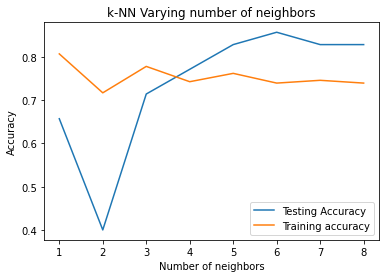

In [31]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [32]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [34]:
#Fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [35]:
knn.score(x_test,y_test)

0.8571428571428571

In [36]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(x_test)

confusion_matrix(y_test,y_pred)

array([[ 3,  3],
       [ 2, 27]])

In [37]:
#import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.90      0.93      0.92        29

    accuracy                           0.86        35
   macro avg       0.75      0.72      0.73        35
weighted avg       0.85      0.86      0.85        35



## 2. Building model using Decision Tree and find the accuracy evaluation 

In [38]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [40]:
y_pred_gini = clf_gini.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8286


In [42]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = clf_gini.predict(x_test)

confusion_matrix(y_test,y_pred)

array([[ 0,  6],
       [ 0, 29]])

In [43]:
#import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.83      1.00      0.91        29

    accuracy                           0.83        35
   macro avg       0.41      0.50      0.45        35
weighted avg       0.69      0.83      0.75        35



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3. Building model using SVM and find the accuracy evaluation

In [44]:
#Import Libraries
from sklearn.svm import SVC

SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(gamma='auto', max_iter=100)

In [45]:
#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(x_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(x_test, y_test))

SVCModel Train Score is :  0.7491961414790996
SVCModel Test Score is :  0.8285714285714286


In [46]:
#Calculating Prediction
y_pred = SVCModel.predict(x_test)

#Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 0,  6],
       [ 0, 29]])

In [47]:
#import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.83      1.00      0.91        29

    accuracy                           0.83        35
   macro avg       0.41      0.50      0.45        35
weighted avg       0.69      0.83      0.75        35



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4. Building model using Logistic Regression and find the accuracy evaluation

In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty="l2")
log_reg.fit(x_train,y_train)


LogisticRegression()

In [50]:
#Calculating Details
y_pred_log_reg = log_reg.predict(x_test)

print('Model accuracy score with criterion y_pred_log_reg : {0:0.4f}'. format(accuracy_score(y_test, y_pred_log_reg)))

Model accuracy score with criterion y_pred_log_reg : 0.8286


In [51]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = log_reg.predict(x_test)

confusion_matrix(y_test,y_pred)

array([[ 0,  6],
       [ 0, 29]])

In [52]:
#import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.83      1.00      0.91        29

    accuracy                           0.83        35
   macro avg       0.41      0.50      0.45        35
weighted avg       0.69      0.83      0.75        35



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


finish